# calculating the bispectrum for survey geometry

In [1]:
import os, time
import numpy as np 
from simbig import halos as Halos
from simbig import galaxies as Galaxies
from simbig import forwardmodel as FM

In [2]:
from simbig import obs as CosmoObs

In [3]:
# --- plotting ---
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

## Read in `Quijote` halo catalog and populate with galaxies
I'm using `i=1118`th cosmology in the LHC because that's the closest to the cosmology used in Manera+(2015)

In [4]:
# read in halo catalog
halos = Halos.Quijote_LHC_HR(1118, z=0.5)
print('Om, Ob, h, ns, s8:')
print(Halos.Quijote_LHC_cosmo(1118))

# get LOWZ HOD parameters
theta_hod = Galaxies.thetahod_lowz_sgc()
# populate halos
hod = Galaxies.hodGalaxies(halos, theta_hod, seed=0)

Om, Ob, h, ns, s8:
(0.2671, 0.03993, 0.6845, 0.96030000000000004, 0.78549999999999998)


## Forward model survey geometry and generate matching randoms

In [5]:
gals = FM.BOSS(hod, sample='lowz-south', seed=0, veto=False, fiber_collision=False, silent=False)

..applying angular mask takes 1 sec
..applying radial selection
..footprint covers 0.067 of sky


In [6]:
rand = FM.BOSS_randoms(gals, sample='lowz-south', veto=False) # random without veto mask 

## Calculate bispectrum using `simbig.obs.B0k_survey`

In [7]:
t0 = time.time()
b123 = CosmoObs.B0k_survey(gals, rand, 
                         P0=1e4, 
                         Ngrid=360, 
                         Lbox=1400, 
                         silent=False)
print('B0 take %f sec' % ((time.time() - t0)))

alpha = 0.017311
--- 86405 positions in 1400 box ---
--- calculating the FFT for data ---
['275.1 < x < 698.8\n', '-463.0 < y < 493.4\n', '-133.1 < z < 408.6\n']
86405 positions
Ntot=86405.00
I12=4.24e+03
I13=9.42e+02
I22=1.49e+00
I23=3.30e-01
I33=1.16e-04
positions assigned to grid
delta_0(k) complete
--- calculating the FFT for random ---
['275.2 < x < 699.1\n', '-476.7 < y < 493.9\n', '-133.2 < z < 412.2\n']
4991403 positions
Ntot=4991403.00
I12=2.45e+05
I13=5.44e+04
I22=8.60e+01
I23=1.91e+01
I33=6.69e-03
positions assigned to grid
delta_0(k) complete
alpha=1.731076e-02
--- calculating the bispectrum ---
B0 take 678.878408 sec


In [9]:
klim = (b123[0] < 0.5) & (b123[1] < 0.5) & (b123[2] < 0.5)

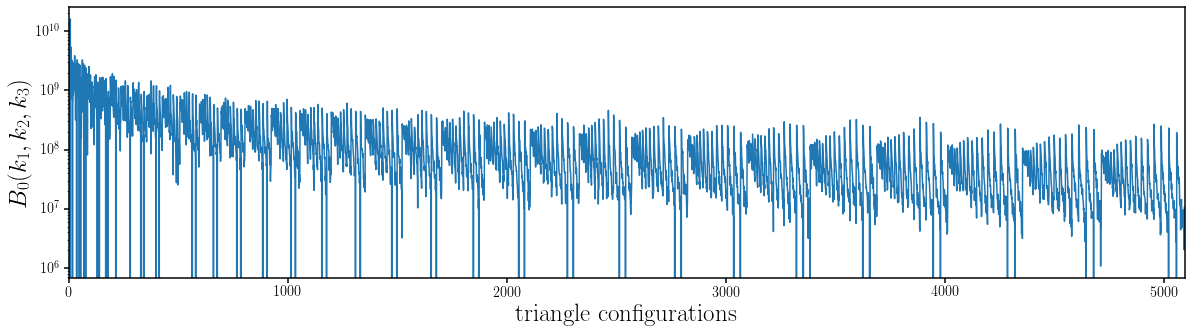

In [13]:
fig = plt.figure(figsize=(20,5))
sub = fig.add_subplot(111)
sub.plot(range(np.sum(klim)), b123[3][klim])
sub.set_xlabel('triangle configurations', fontsize=25)
sub.set_xlim(0, np.sum(klim))
sub.set_ylabel('$B_0(k_1, k_2, k_3)$', fontsize=25)
sub.set_yscale('log')